In [35]:
import geopandas as gpd
import pandas as pd
import numpy as np
from shapely.geometry import Polygon
import pysal as ps
import matplotlib.pyplot as pt


file_path = r"C:\Users\admin\geopython\L4\L4_Data\population_admin_units.shp"

shp = gpd.read_file(file_path)

shp.dtypes

shp.crs

{'proj': 'lcc',
 'lat_1': 58,
 'lat_2': 59.33333333333334,
 'lat_0': 57.51755393055556,
 'lon_0': 24,
 'x_0': 500000,
 'y_0': 6375000,
 'ellps': 'GRS80',
 'units': 'm',
 'no_defs': True}

In [36]:
def change_type (row):
    try:
        return int(row['population'])
    except:
        return np.nana

shp["population_numeric"] = shp.apply(change_type, axis=1)

shp.head(5)


,VID,KOOD,NIMI,population,geometry,population_numeric
0,41158132.0,0698,Rõuge vald,5435,"POLYGON ((646935.772312 6394632.93974981, 6470...",5435
1,41158133.0,0855,Valga vald,15989,"POLYGON ((620434.775846644 6406412.85221975, 6...",15989
2,41158134.0,0732,Setomaa vald,3369,"(POLYGON ((698977.67655779 6412793.36230097, 6...",3369
3,41158135.0,0917,Võru vald,10793,"POLYGON ((656207.140703753 6413138.43813412, 6...",10793
4,41158136.0,0142,Antsla vald,4514,"POLYGON ((640706.698387788 6417414.06838516, 6...",4514


In [38]:
def cal_area (row):
    poly=row['geometry']
    area_sq_M =poly.area
    area_sq_Km = (area_sq_M/1000000)
    return area_sq_Km


shp["area_km2"] = shp.apply(cal_area,axis=1)

shp = shp.to_crs(epsg=3301)
shp.head(5)


,VID,KOOD,NIMI,population,geometry,population_numeric,area_km2
0,41158132.0,0698,Rõuge vald,5435,"POLYGON ((646935.7723120195 6394632.939749278,...",5435,932.929449
1,41158133.0,0855,Valga vald,15989,"POLYGON ((620434.7758466596 6406412.85221923, ...",15989,751.164799
2,41158134.0,0732,Setomaa vald,3369,(POLYGON ((698977.6765578158 6412793.362300455...,3369,462.881320
3,41158135.0,0917,Võru vald,10793,"POLYGON ((656207.1407037731 6413138.438133608,...",10793,950.659749
4,41158136.0,0142,Antsla vald,4514,"POLYGON ((640706.6983878058 6417414.068384654,...",4514,408.563278


In [39]:
def pop_density (row):
    pop= row["population_numeric"]
    area = row ["area_km2"]
    pop_dens = (pop/area)
    return pop_dens


shp["pop_density"] = shp.apply(pop_density,axis=1)

shp.head()

,VID,KOOD,NIMI,population,geometry,population_numeric,area_km2,pop_density
0,41158132.0,0698,Rõuge vald,5435,"POLYGON ((646935.7723120195 6394632.939749278,...",5435,932.929449,5.825735
1,41158133.0,0855,Valga vald,15989,"POLYGON ((620434.7758466596 6406412.85221923, ...",15989,751.164799,21.285609
2,41158134.0,0732,Setomaa vald,3369,(POLYGON ((698977.6765578158 6412793.362300455...,3369,462.881320,7.278324
3,41158135.0,0917,Võru vald,10793,"POLYGON ((656207.1407037731 6413138.438133608,...",10793,950.659749,11.353168
4,41158136.0,0142,Antsla vald,4514,"POLYGON ((640706.6983878058 6417414.068384654,...",4514,408.563278,11.048472


In [40]:
classifier = ps.Quantiles.make(k=10)

shp["pop_den_classes"] = shp[["pop_density"]].apply(classifier)

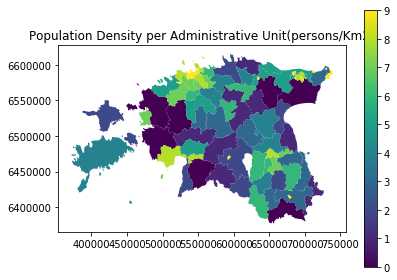

In [41]:
shp.plot(column="pop_den_classes", linewidth=0.5,legend=True);
pt.title("Population Density per Administrative Unit(persons/Km2)")
pt.tight_layout()